# **New York City Yellow Taxi Data**

Author: VamsiKishna Koundinya Nandigama<br>
Project: Exploratory Data Analysis - Optimising NYC Taxi Operations

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df_temp = pd.read_parquet('/Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/trip_records/2023-1.parquet')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe to store for all months
all_months_sampled_data = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # Check if the file is a parquet file. If not, skip to the next file
        if not file_name.endswith('.parquet'):
            continue
        
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(f"Reading file: {file_path}")

        # Reading the current file
        month_data = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_day_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date_val in month_data['tpep_pickup_datetime'].dt.date.unique():
            
            # Filter data for the current date
            day_data = month_data[month_data['tpep_pickup_datetime'].dt.date == date_val]

            # Iterate through each hour of the selected date
            for hour in range(24):

                # Get the hourly data for the selected date
                hour_data = day_data[day_data['tpep_pickup_datetime'].dt.hour == hour]

                # Check if there is data for the current hour.  If not, skip to the next hour.
                if hour_data.empty:
                    continue

                # Sample of 5% of the data for the current hour
                sampled_hour_data = hour_data.sample(frac=0.05, random_state=42)

                # add data of this hour to the dataframe
                sampled_day_data = pd.concat([sampled_day_data, sampled_hour_data], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        all_months_sampled_data = pd.concat([all_months_sampled_data, sampled_day_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Reading file: /Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/trip_records/2023-12.parquet
Reading file: /Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/trip_records/2023-6.parquet
Reading file: /Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/trip_records/2023-7.parquet
Reading file: /Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/trip_records/2023-5.parquet
Reading file: /Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/trip_records/2023-11.parquet
Reading file: /Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/trip_records/2023-10.parquet
Reading file: /Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/trip_records/2023-4.parquet
Reading file: /Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/trip_records/2023-1.parquet
Reading file: /Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/trip_records/2023-8.parquet
Reading file: /Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/trip_

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in parquet
all_months_sampled_data_file_name = "2023-sampled_data.parquet"
all_months_sampled_data_file_path = os.path.join(os.getcwd(), all_months_sampled_data_file_name)
all_months_sampled_data.to_parquet(all_months_sampled_data_file_path, index=False)

print(f"All months sampled data saved to - {all_months_sampled_data_file_path}")

All months sampled data saved to - /Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/trip_records/2023-sampled_data.parquet


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [56]:
# Load the new data file
df = pd.read_parquet(all_months_sampled_data_file_path)


In [57]:
df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
5         2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
6         2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   
7         2  2023-12-01 00:36:28   2023-12-01 00:36:34              1.0   
8         2  2023-12-01 00:01:25   2023-12-01 00:07:45              1.0   
9         2  2023-12-01 00:14:06   2023-12-01 00:18:02              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           4.79         NaN               None           231            61   
2           1.05         1.0                  N           161           161   
3           2.08         NaN               None           137           144   
4           0.40         1.0                  N            68            68   
5           1.66         1.0                  N           114           186   
6           2.45         1.0                  N           164           232   
7           0.00         5.0                  N           170           170   
8           1.08         1.0                  N           114           231   
9           1.37         1.0                  N           239            24   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1        23.30    1.0      0.5        5.66           0.0   
1             0        22.43    0.0      0.5        3.00           0.0   
2             1        10.70    1.0      0.5        3.14           0.0   
3             0        17.22    0.0      0.5        0.00           0.0   
4             1         5.10    1.0      0.5        0.00           0.0   
5             1        10.70    1.0      0.5        3.14           0.0   
6             1        14.90    1.0      0.5        1.00           0.0   
7             1        11.00    0.0      0.0        2.90           0.0   
8             1         8.60    1.0      0.5        2.00           0.0   
9             1         7.90    1.0      0.5        2.58           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.96                   2.5          0.0   
1                    1.0         29.43                   NaN          NaN   
2                    1.0         18.84                   2.5          0.0   
3                    1.0         21.22                   NaN          NaN   
4                    1.0         10.10                   2.5          0.0   
5                    1.0         18.84                   2.5          0.0   
6                    1.0         20.90                   2.5          0.0   
7                    1.0         17.40                   2.5          0.0   
8                    1.0         15.60                   2.5          0.0   
9                    1.0         15.48                   2.5          0.0   

   airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  
6          NaN  
7          NaN  
8          NaN  
9          NaN

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [59]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)

# Drop the columns that are not needed
df.drop(columns=['VendorID'], inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [60]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)
df = df.drop(columns=['Airport_fee'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[us]
 1   tpep_dropoff_datetime  datetime64[us]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   store_and_fwd_flag     object        
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[us](2), 

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [63]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]


Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

- There are no negative values of fare amount

Did you notice something different in the `RatecodeID` column for above records?

- RatecodeID has NaN values and its data type is float. Ideally, it should be int and values should be between 1 and 6. Missing values treatment need to be done for this column.

In [64]:
monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                   'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

In [65]:
# Analyse RatecodeID for the negative fare amounts
negative_fares = df[df['fare_amount'] < 0]

# Group by RatecodeID and get value counts
ratecode_analysis = negative_fares.groupby('RatecodeID').value_counts()

# Display the analysis
print("\nAnalysis of Negative Fare Amounts by RatecodeID:")
print(ratecode_analysis)



Analysis of Negative Fare Amounts by RatecodeID:
Series([], Name: count, dtype: int64)


In [66]:
# Find which columns have negative values
negative_cols = df[monetary_columns].lt(0).sum()
print("Monetary Columns with negative values:")
print(negative_cols[negative_cols > 0])


Monetary Columns with negative values:
extra                     3
mta_tax                  73
improvement_surcharge    78
total_amount             78
congestion_surcharge     56
airport_fee              15
dtype: int64


In [67]:
# fix these negative values
# Drop rows with negative values in monetary columns
df = df[df[monetary_columns].ge(0).all(axis=1)]
df = df.reset_index(drop=True)

In [68]:
# Lets check again after fixing negative values
negative_cols = df[monetary_columns].lt(0).sum()
print("Monetary Columns with negative values after fixing:")
print(negative_cols[negative_cols > 0])

Monetary Columns with negative values after fixing:
Series([], dtype: int64)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [69]:
# Find the proportion of missing values in each column
missing_proportions = df.isnull().mean() * 100
print("Proportion of missing values in each column:")
print(missing_proportions[missing_proportions > 0])


Proportion of missing values in each column:
Series([], dtype: float64)


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [70]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].fillna(1)  # Most common value is 1


Did you find zeroes in passenger_count? Handle these.

In [71]:
df['passenger_count'] = df['passenger_count'].replace(0, 1)  # Replace 0 with 1 as it's not logical

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [72]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(1)  # Standard rate is most common per data dictionary. So,better to impute with 1

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [73]:
# handle null values in congestion_surcharge
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)  # If missing, assume no congestion surcharge


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [74]:
missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", missing_cols)

Columns with missing values: []


In [75]:
# Convert to int64 after imputation
df['passenger_count'] = df['passenger_count'].astype('int64')
df['RatecodeID'] = df['RatecodeID'].astype('int64')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831447 entries, 0 to 1831446
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[us]
 1   tpep_dropoff_datetime  datetime64[us]
 2   passenger_count        int64         
 3   trip_distance          float64       
 4   RatecodeID             int64         
 5   store_and_fwd_flag     object        
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[us](2), 

In [77]:
df.describe().T

count                        mean  \
tpep_pickup_datetime     1831447  2023-07-01 21:15:08.089107   
tpep_dropoff_datetime    1831447  2023-07-01 21:32:30.045128   
passenger_count        1831447.0                    1.385416   
trip_distance          1831447.0                     3.55147   
RatecodeID             1831447.0                    1.634699   
PULocationID           1831447.0                  165.459623   
DOLocationID           1831447.0                   164.33603   
payment_type           1831447.0                    1.205004   
fare_amount            1831447.0                   19.826299   
extra                  1831447.0                    1.638281   
mta_tax                1831447.0                     0.49534   
tip_amount             1831447.0                    3.573816   
tolls_amount           1831447.0                    0.595869   
improvement_surcharge  1831447.0                    0.999299   
total_amount           1831447.0                   28.950167   
congestion_surcharge   1831447.0                      2.3077   
airport_fee            1831447.0                    0.142917   

                                       min                         25%  \
tpep_pickup_datetime   2022-12-31 23:51:30         2023-04-01 20:11:30   
tpep_dropoff_datetime  2022-12-31 23:56:06  2023-04-01 20:26:25.500000   
passenger_count                        1.0                         1.0   
trip_distance                          0.0                        1.05   
RatecodeID                             1.0                         1.0   
PULocationID                           1.0                       132.0   
DOLocationID                           1.0                       114.0   
payment_type                           1.0                         1.0   
fare_amount                            0.0                         9.3   
extra                                  0.0                         0.0   
mta_tax                                0.0                         0.5   
tip_amount                             0.0                         1.0   
tolls_amount                           0.0                         0.0   
improvement_surcharge                  0.0                         1.0   
total_amount                           0.0                       15.96   
congestion_surcharge                   0.0                         2.5   
airport_fee                            0.0                         0.0   

                                       50%                         75%  \
tpep_pickup_datetime   2023-06-26 08:19:45  2023-10-05 19:16:13.500000   
tpep_dropoff_datetime  2023-06-26 08:35:48  2023-10-05 19:33:42.500000   
passenger_count                        1.0                         1.0   
trip_distance                         1.78                        3.37   
RatecodeID                             1.0                         1.0   
PULocationID                         162.0                       234.0   
DOLocationID                         162.0                       234.0   
payment_type                           1.0                         1.0   
fare_amount                           13.5                        21.9   
extra                                  1.0                         2.5   
mta_tax                                0.5                         0.5   
tip_amount                            2.86                        4.45   
tolls_amount                           0.0                         0.0   
improvement_surcharge                  1.0                         1.0   
total_amount                          21.0                        30.7   
congestion_surcharge                   2.5                         2.5   
airport_fee                            0.0                         0.0   

                                       max         std  
tpep_pickup_datetime   2023-12-31 23:57:51         NaN  
tpep_dropoff_datetime  2024-01-01 20:50:55         NaN  
passenger_count                      

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [79]:
# helper function to detect outliers (IQR method)
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    
    return outliers

In [81]:
# divide in to numerical columns, categorical columns and date columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
date_columns = ['tpep_pickup_datetime','tpep_dropoff_datetime']


Numerical Columns Analysis:

passenger_count:
Percentage of outliers: 23.18%


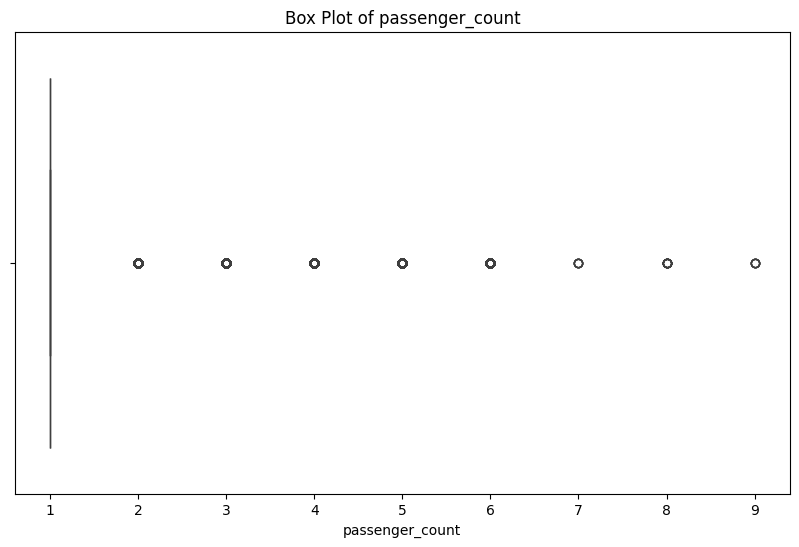


trip_distance:
Percentage of outliers: 13.22%


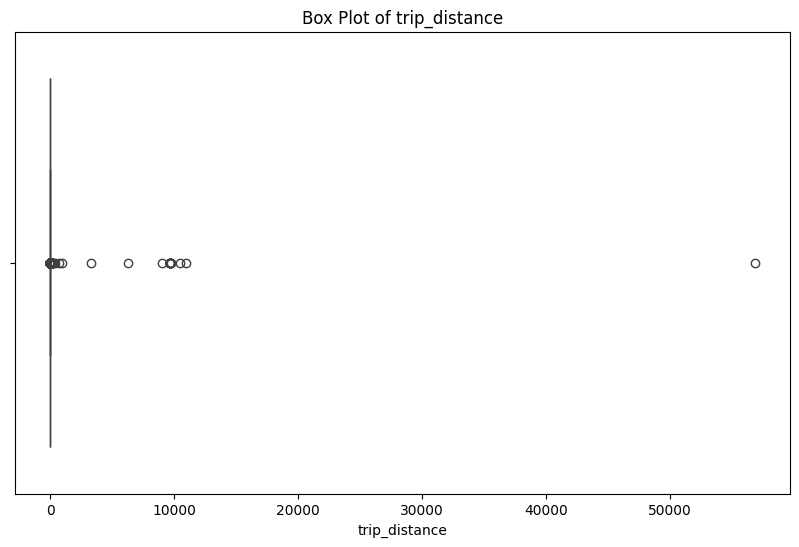


RatecodeID:
Percentage of outliers: 5.58%


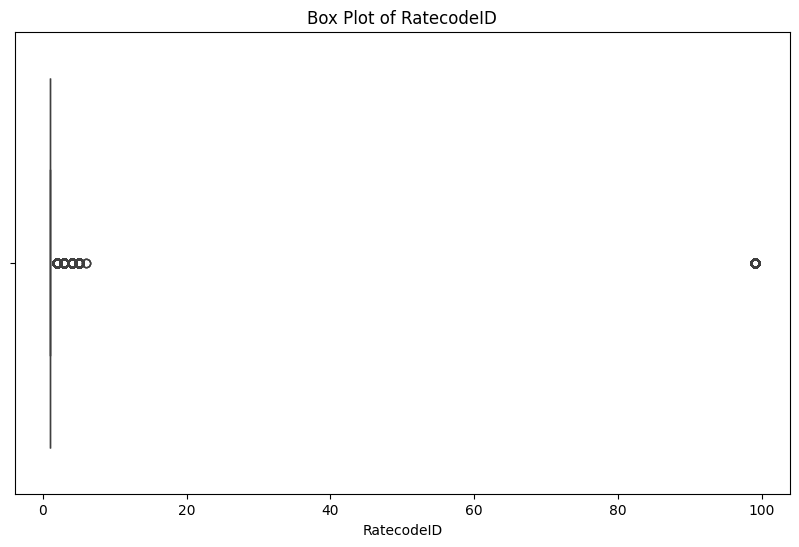


payment_type:
Percentage of outliers: 18.51%


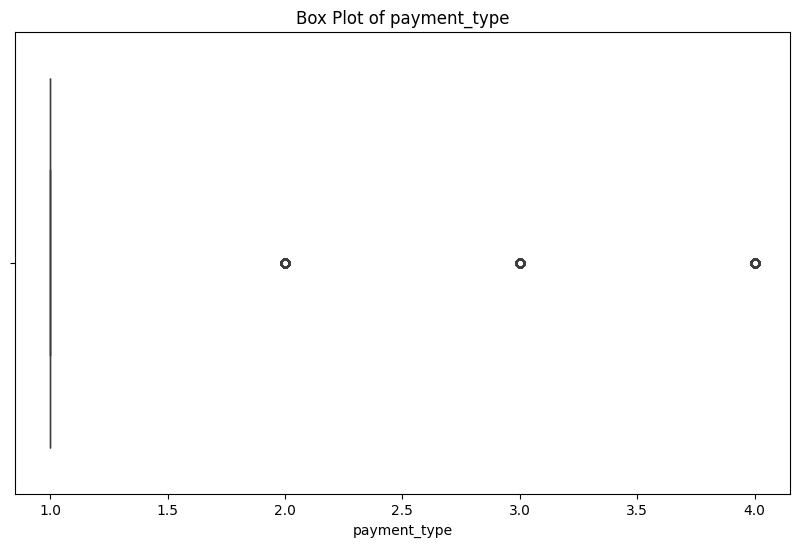


fare_amount:
Percentage of outliers: 10.46%


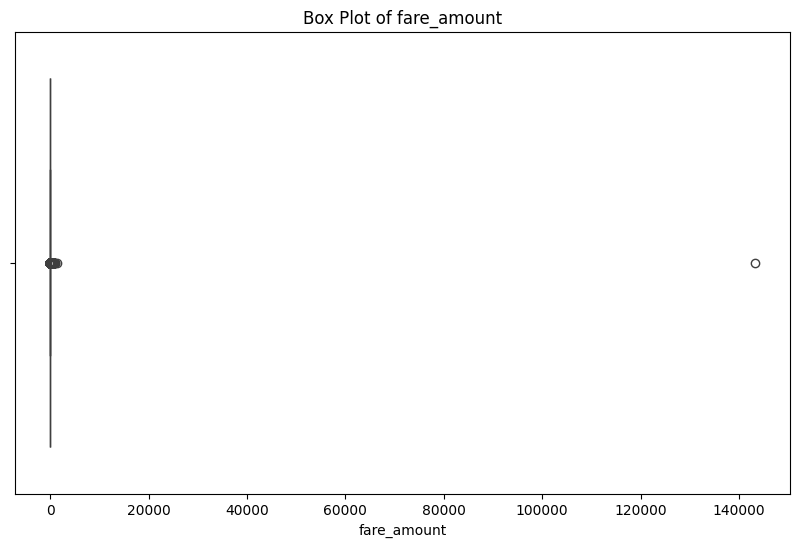


extra:
Percentage of outliers: 1.84%


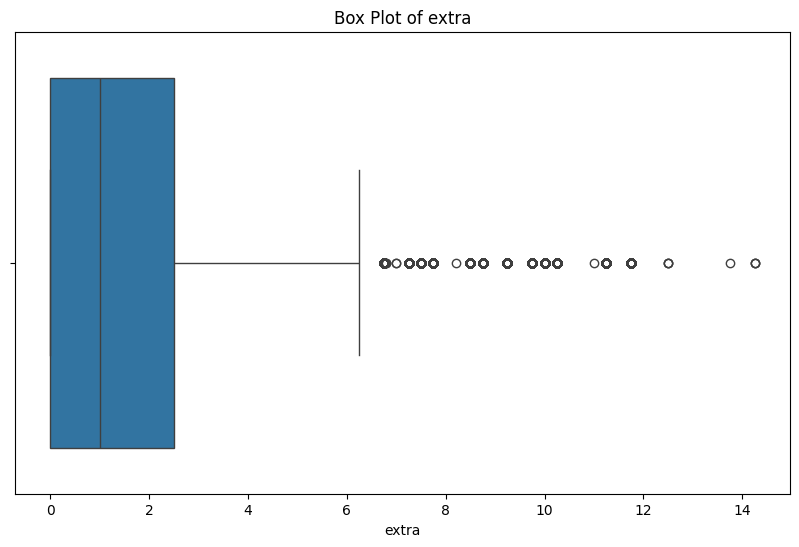


mta_tax:
Percentage of outliers: 0.94%


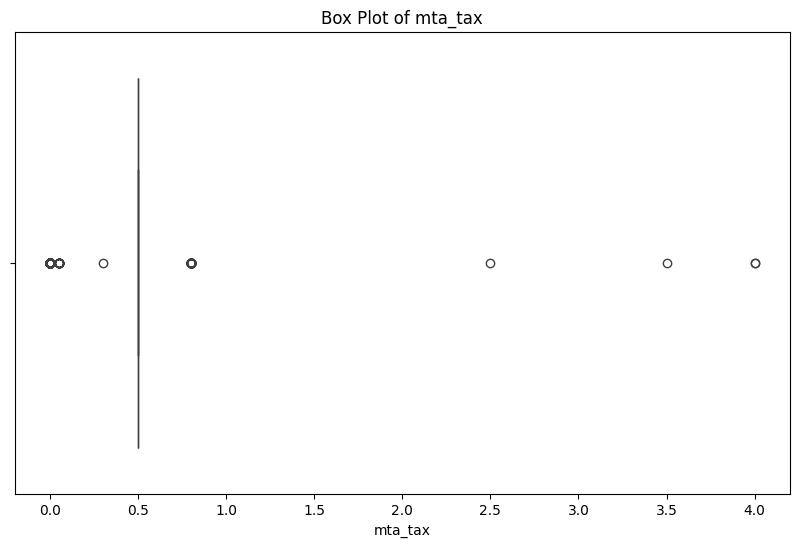


tip_amount:
Percentage of outliers: 7.73%


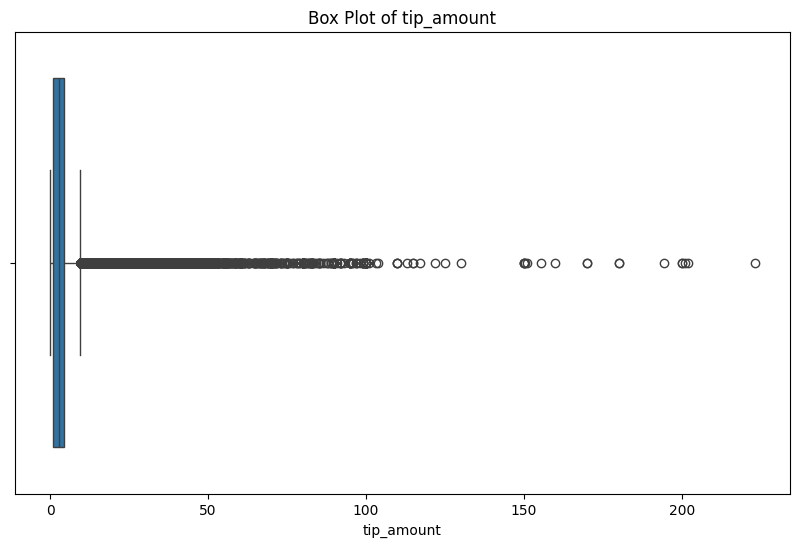


tolls_amount:
Percentage of outliers: 8.12%


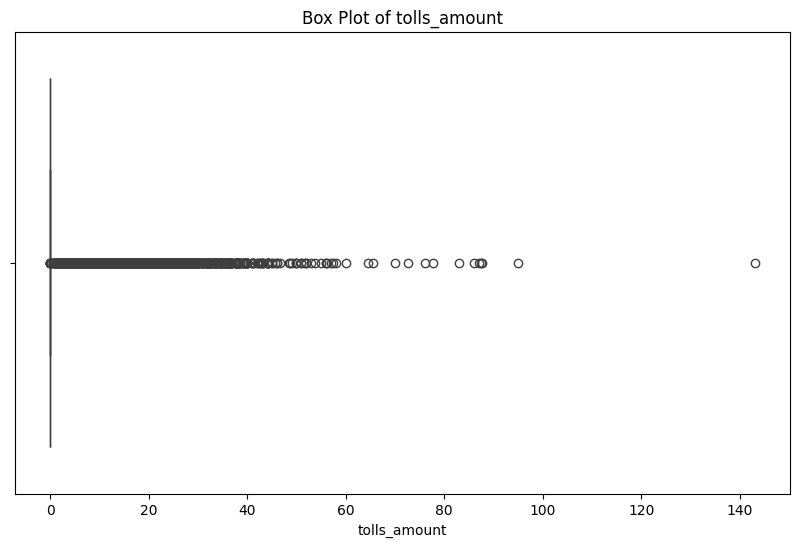


improvement_surcharge:
Percentage of outliers: 0.08%


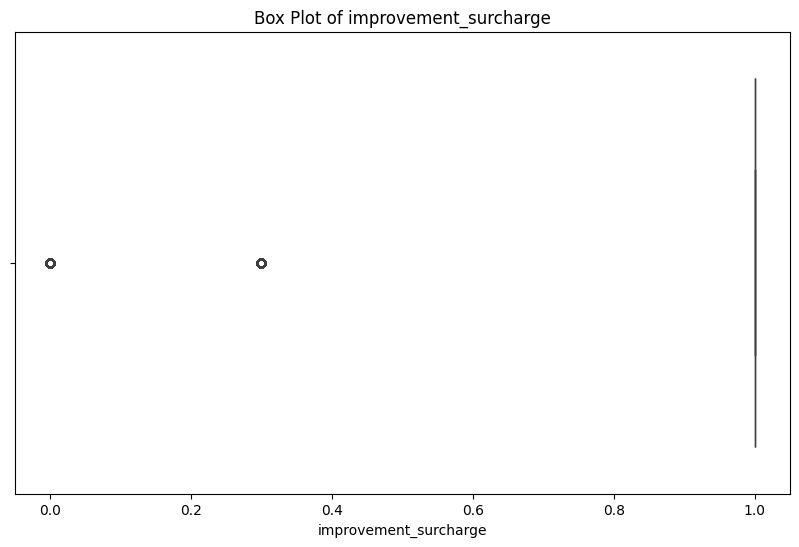


total_amount:
Percentage of outliers: 11.75%


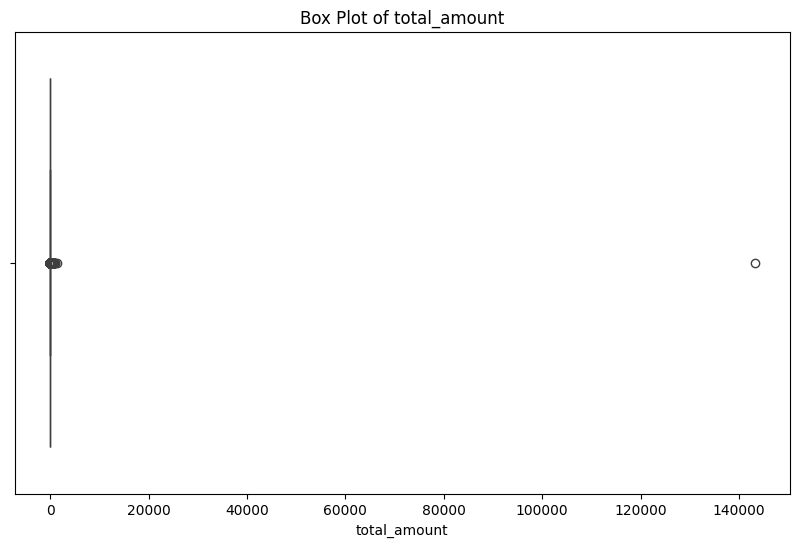


congestion_surcharge:
Percentage of outliers: 7.69%


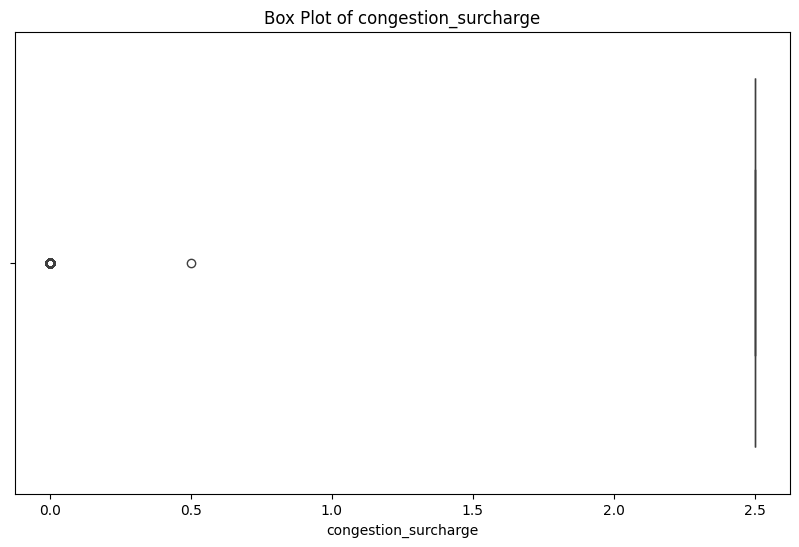


airport_fee:
Percentage of outliers: 8.79%


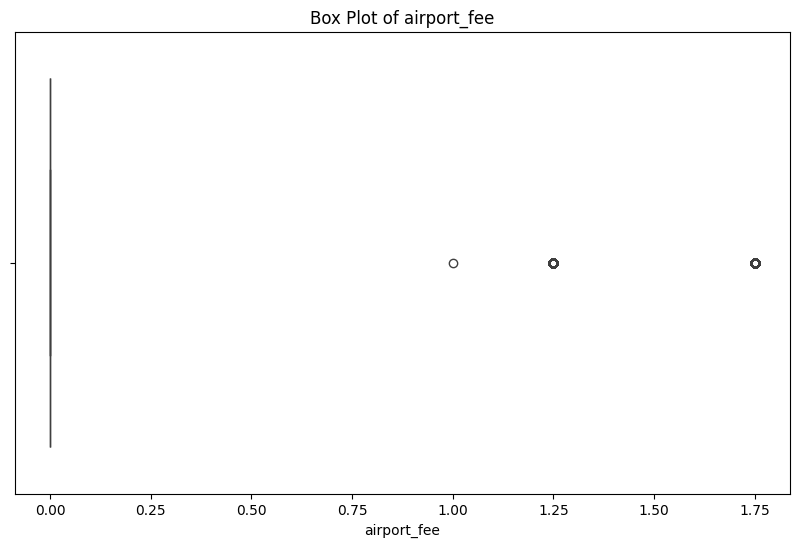

In [85]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

print("Numerical Columns Analysis:")

# Analyze each numerical column for outliers
for column in numerical_columns:
    outliers = detect_outliers(df[column])
    if len(outliers) > 0:
        print(f"\n{column}:")
        print(f"Percentage of outliers: {(len(outliers) / len(df) * 100):.2f}%")
        
        # Create box plot for visualization
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column}')
        plt.show()


Caetgorical Columns Analysis:
store_and_fwd_flag
N    1820208
Y      11239
Name: count, dtype: int64


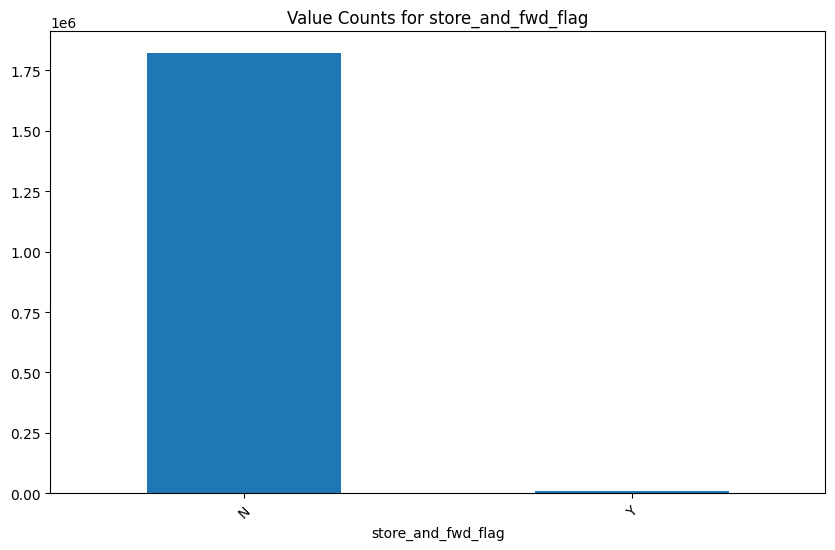

In [91]:
print("Caetgorical Columns Analysis:")
for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(value_counts)
    
    # Create bar plot for visualization
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Value Counts for {column}')
    plt.xticks(rotation=45)
    plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [92]:
# remove passenger_count > 6

# Remove passenger counts > 6 as they are likely errors
df = df[df['passenger_count'] <= 6]

In [93]:
# Continue with outlier handling

# Remove trips with distance > 250 miles as they are likely errors
df = df[df['trip_distance'] <= 250]


In [94]:
# Remove trips with payment_type 0 as it's not defined in data dictionary
df = df[df['payment_type'] != 0]

In [95]:
# Remove trips where distance is 0 but pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID']))]


In [96]:
# Remove trips where distance is nearly 0 and fare is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

In [98]:
# Do any columns need standardising?
df.describe().T


count                        mean  \
tpep_pickup_datetime     1823657  2023-07-01 21:49:23.844228   
tpep_dropoff_datetime    1823657  2023-07-01 22:06:44.467478   
passenger_count        1823657.0                    1.386003   
trip_distance          1823657.0                    3.459244   
RatecodeID             1823657.0                    1.579548   
PULocationID           1823657.0                  165.518554   
DOLocationID           1823657.0                  164.334805   
payment_type           1823657.0                     1.20454   
fare_amount            1823657.0                   19.792861   
extra                  1823657.0                     1.64127   
mta_tax                1823657.0                    0.495522   
tip_amount             1823657.0                     3.58039   
tolls_amount           1823657.0                    0.592915   
improvement_surcharge  1823657.0                    0.999483   
total_amount           1823657.0                   28.927398   
congestion_surcharge   1823657.0                    2.312077   
airport_fee            1823657.0                    0.143231   

                                       min                  25%  \
tpep_pickup_datetime   2022-12-31 23:51:30  2023-04-01 20:53:45   
tpep_dropoff_datetime  2022-12-31 23:56:06  2023-04-01 21:08:35   
passenger_count                        1.0                  1.0   
trip_distance                          0.0                 1.06   
RatecodeID                             1.0                  1.0   
PULocationID                           1.0                132.0   
DOLocationID                           1.0                114.0   
payment_type                           1.0                  1.0   
fare_amount                            0.0                  9.3   
extra                                  0.0                  0.0   
mta_tax                                0.0                  0.5   
tip_amount                             0.0                  1.0   
tolls_amount                           0.0                  0.0   
improvement_surcharge                  0.0                  1.0   
total_amount                           0.0                15.96   
congestion_surcharge                   0.0                  2.5   
airport_fee                            0.0                  0.0   

                                       50%                  75%  \
tpep_pickup_datetime   2023-06-26 08:50:24  2023-10-05 19:43:12   
tpep_dropoff_datetime  2023-06-26 09:07:28  2023-10-05 20:01:55   
passenger_count                        1.0                  1.0   
trip_distance                          1.8                 3.39   
RatecodeID                             1.0                  1.0   
PULocationID                         162.0                234.0   
DOLocationID                         162.0                234.0   
payment_type                           1.0                  1.0   
fare_amount                           13.5                 21.9   
extra                                  1.0                  2.5   
mta_tax                                0.5                  0.5   
tip_amount                            2.86                 4.45   
tolls_amount                           0.0                  0.0   
improvement_surcharge                  1.0                  1.0   
total_amount                          21.0                30.63   
congestion_surcharge                   2.5                  2.5   
airport_fee                            0.0                  0.0   

                                       max         std  
tpep_pickup_datetime   2023-12-31 23:57:51         NaN  
tpep_dropoff_datetime  2024-01-01 20:50:55         NaN  
passenger_count                        6.0    0.877066  
trip_distance                       204.86    4.548931  
RatecodeID                            99.0    7.032053  
PULocationID                         265.0   63.640018  
DOLocationID                         265.0   69.710698  
paym

- All columns looks good and no standardisation is required.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [97]:
df.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

In [99]:
# divide in to numerical columns, categorical columns and date columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
date_columns = ['tpep_pickup_datetime','tpep_dropoff_datetime']

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [123]:
# Find and show the hourly trends in taxi pickups

#  Extract hour from pickup datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Calculate trips per hour
hourly_trips = df.groupby('hour').size().reset_index(name='trip_count')

# Hourly Trends Vsiualization
sns.barplot(x='hour', y='trip_count', data=hourly_trips)
plt.title('Number of Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


Daily pickup trends:
  day_of_week  trip_count
0      Friday      270370
1      Monday      227852
2    Saturday      264895
3      Sunday      229414
4    Thursday      286081
5     Tuesday      264716
6   Wednesday      280329


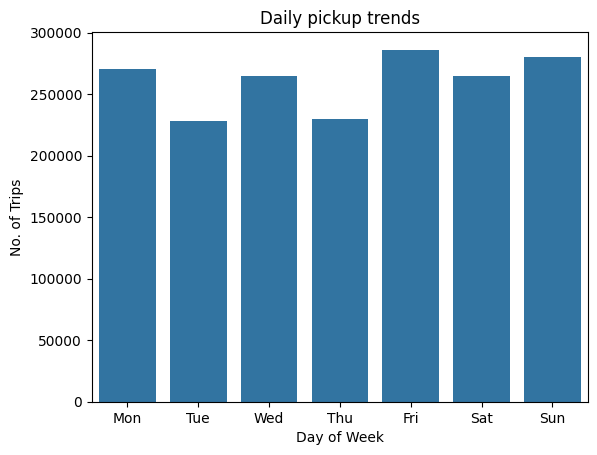

In [122]:
# Find and show the daily trends in taxi pickups (days of the week)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

# Calculate trips per day of week
daily_trends = df.groupby('day_of_week').size().reset_index(name='trip_count')

print("Daily pickup trends:")
print(daily_trends)

# Day of Week Trends Vsiualization
sns.barplot(x='day_of_week', y='trip_count', data=daily_trends)
plt.title('Daily pickup trends')
plt.xlabel('Day of Week')
plt.ylabel('No. of Trips')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


Monthly pickup trends:
    month  trip_count
0       1      147774
1       2      140015
2       3      163498
3       4      157831
4       5      168270
5       6      158319
6       7      139110
7       8      134634
8       9      133387
9      10      165921
10     11      157838
11     12      157060


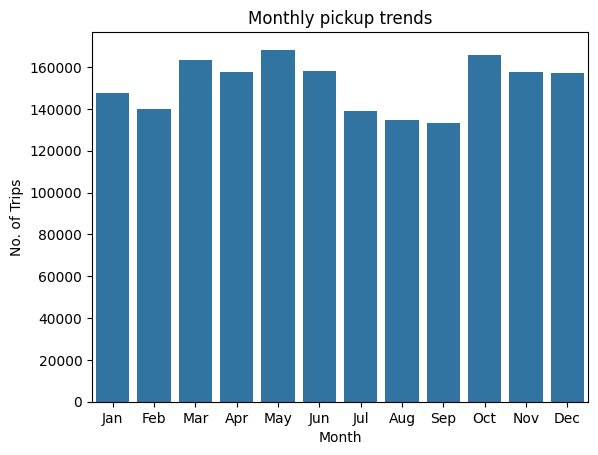

In [121]:
# Show the monthly trends in pickups
df['month'] = df['tpep_pickup_datetime'].dt.month
monthly_trends = df.groupby('month').size().reset_index(name='trip_count')

print("Monthly pickup trends:")
print(monthly_trends)

# Monthly Trends Vsiualization
sns.barplot(x='month', y='trip_count', data=monthly_trends)
plt.title('Monthly pickup trends')
plt.xlabel('Month')
plt.ylabel('No. of Trips')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [116]:
# Analyse the above parameters
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
print("Financial parameters analysis:")
print(df[financial_cols].describe())



Financial parameters analysis:
        fare_amount    tip_amount  total_amount  trip_distance
count  1.823657e+06  1.823657e+06  1.823657e+06   1.823657e+06
mean   1.979286e+01  3.580390e+00  2.892740e+01   3.459244e+00
std    1.075556e+02  4.066419e+00  1.084332e+02   4.548931e+00
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00
25%    9.300000e+00  1.000000e+00  1.596000e+01   1.060000e+00
50%    1.350000e+01  2.860000e+00  2.100000e+01   1.800000e+00
75%    2.190000e+01  4.450000e+00  3.063000e+01   3.390000e+00
max    1.431635e+05  2.230800e+02  1.431675e+05   2.048600e+02


- There are no negative values but has zero values

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [117]:
# Create a df with non zero entries for the selected parameters.

# Create a mask for non-zero values in all selected columns
non_zero_mask = (df[financial_cols] != 0).all(axis=1)

# Create new dataframe with non-zero entries
df_new = df[non_zero_mask].copy()



**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

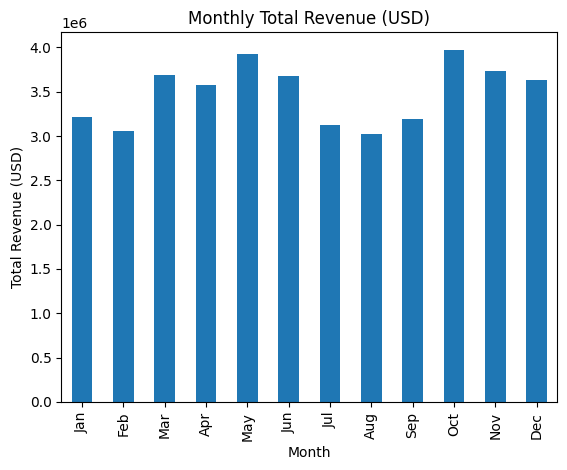

In [120]:
# Group data by month and analyse monthly revenue

# Extract month from pickup datetime
df_new['month'] = df_new['tpep_pickup_datetime'].dt.month

# Calculate monthly total revenue
monthly_revenue = df_new.groupby('month')['total_amount'].sum().reset_index()

# Monthly Revenue Visualization
monthly_revenue['total_amount'].plot(kind='bar')
plt.title('Monthly Total Revenue (USD)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

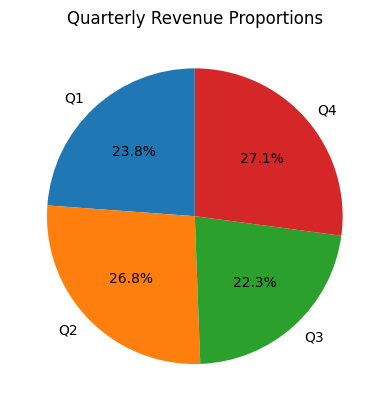

In [124]:
# Calculate proportion of each quarter

# Extract quarter from pickup datetime
df_new['quarter'] = df_new['tpep_pickup_datetime'].dt.quarter

# Calculate quarterly revenue
quarterly_revenue = df_new.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate proportions
quarterly_revenue['proportion'] = (quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum() * 100).round(2)

# Create pie chart
plt.pie(quarterly_revenue['proportion'], 
        labels=['Q1', 'Q2', 'Q3', 'Q4'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Quarterly Revenue Proportions')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

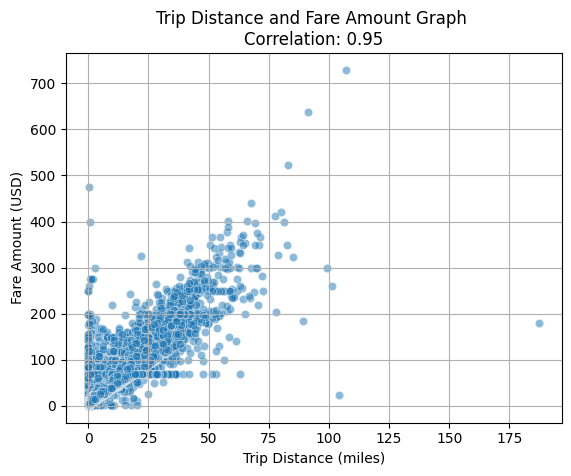

Correlation between trip_distance and fare_amount: 0.95


In [127]:
# Show how trip fare is affected by distance
# Filter out trips with distance = 0
df_trips_filtered = df_new[df_new['trip_distance'] > 0]

# Calculate correlation
correlation = df_trips_filtered['trip_distance'].corr(df_trips_filtered['fare_amount'])

# Create scatter plot
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_trips_filtered, alpha=0.5)
plt.title(f'Trip Distance vs Fare Amount Graph \nCorrelation: {correlation:.2f}')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)
plt.show()

# Print correlation value
print(f"Correlation between trip_distance and fare_amount: {correlation:.2f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between trip_duration and fare_amount: 0.33


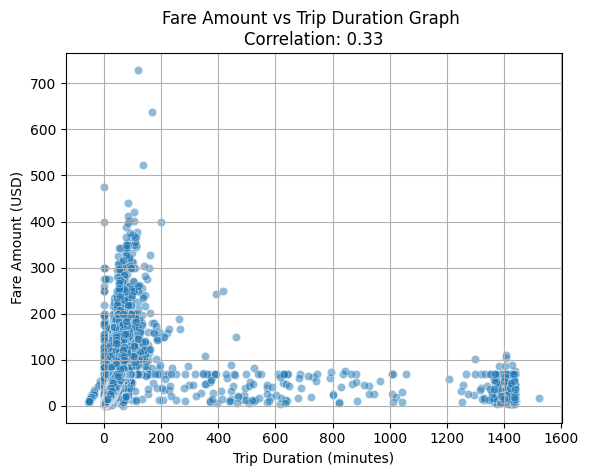

In [128]:
# Show relationship between fare and trip duration

# Calculate trip duration in minutes
df_new['trip_duration'] = (df_new['tpep_dropoff_datetime'] - df_new['tpep_pickup_datetime']).dt.total_seconds() / 60

# Create scatter plot
corr1 = df_new['fare_amount'].corr(df_new['trip_duration'])
sns.scatterplot(x='trip_duration', y='fare_amount', data=df_new, alpha=0.5)
plt.title(f'Fare Amount vs Trip Duration Graph \nCorrelation: {corr1:.2f}')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)

# Print correlation value
print(f"Correlation between trip_duration and fare_amount: {corr1:.2f}")


Correlation between passenger_count and fare_amount: 0.04


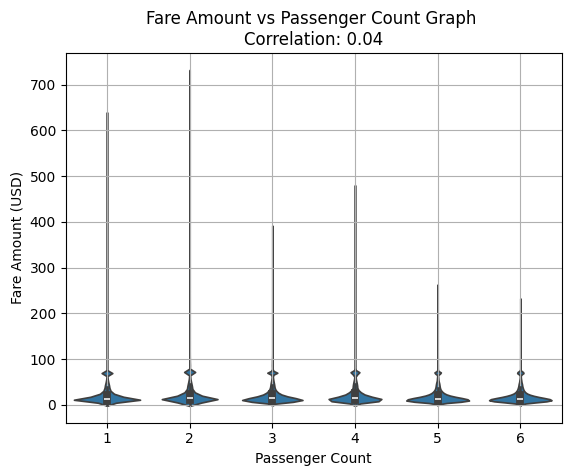

In [132]:
# Show relationship between fare and number of passengers

corr2 = df_new['fare_amount'].corr(df_new['passenger_count'])
sns.violinplot(x='passenger_count', y='fare_amount', data=df_new)
plt.title(f'Fare Amount vs Passenger Count Graph \nCorrelation: {corr2:.2f}')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)

# Print correlation value
print(f"Correlation between passenger_count and fare_amount: {corr2:.2f}")


Correlation between tip_amount and trip_distance: 0.80


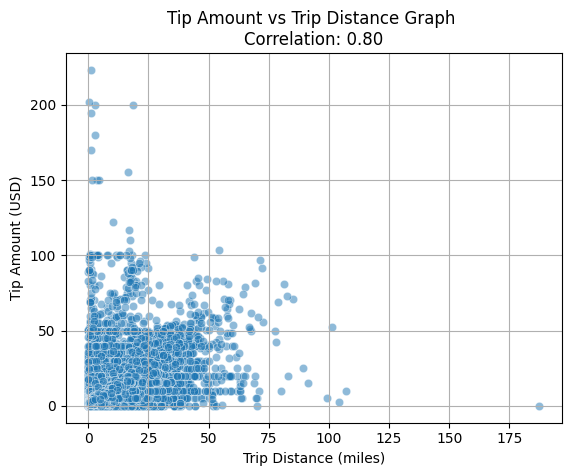

In [134]:
# Show relationship between tip and trip distance

corr3 = df_new['tip_amount'].corr(df_new['trip_distance'])
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_new, alpha=0.5)
plt.title(f'Tip Amount vs Trip Distance Graph \nCorrelation: {corr3:.2f}')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount (USD)')
plt.grid(True)

# Print correlation value
print(f"Correlation between tip_amount and trip_distance: {corr3:.2f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

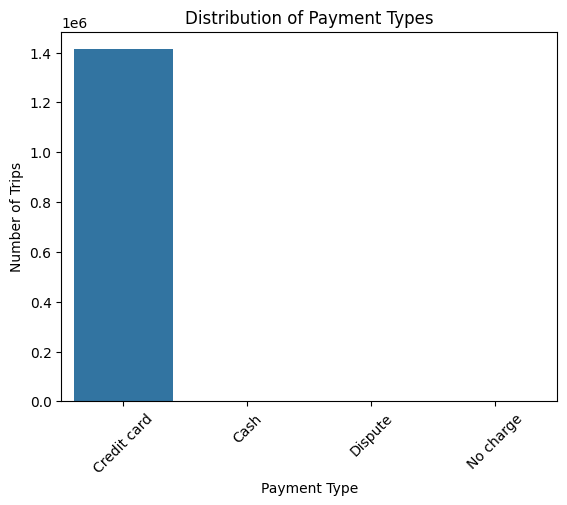

In [137]:
# Analyse the distribution of different payment types (payment_type).

payment_type_dict = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Create a new column with payment type descriptions
df_new['payment_type_desc'] = df_new['payment_type'].map(payment_type_dict)

# Calculate payment type distribution
payment_distribution = df_new['payment_type_desc'].value_counts()
payment_percentage = (payment_distribution / len(df_new) * 100).round(2)

# Plot bar chart
sns.barplot(x=payment_distribution.index, y=payment_distribution.values)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [138]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [139]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/Users/vamsi/Downloads/Starter Notebook - EDA NYC Taxi/data/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...  
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....  
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...  
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...  
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

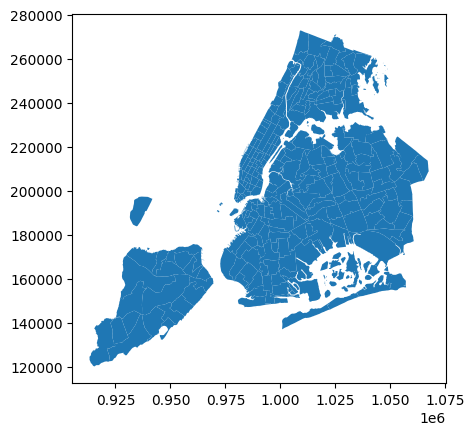

In [140]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [141]:
# Merge zones and trip records using locationID and PULocationID
df_with_zones = df_new.merge(zones[['LocationID', 'zone', 'borough', 'geometry']], 
                        left_on='PULocationID', 
                        right_on='LocationID', 
                        how='left')


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [143]:
# Group data by location and calculate the number of trips
trips_by_location = df_with_zones.groupby('PULocationID').size().reset_index(name='trip_count')
trips_by_location

PULocationID  trip_count
0               1          35
1               2           2
2               4        1403
3               6           1
4               7         253
..            ...         ...
221           261        6909
222           262       19312
223           263       27905
224           264       12284
225           265         171

[226 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [144]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(trips_by_location, 
                             left_on='LocationID', 
                             right_on='PULocationID', 
                             how='left')

# Fill NaN values with 0 for zones with no trips
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0)


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

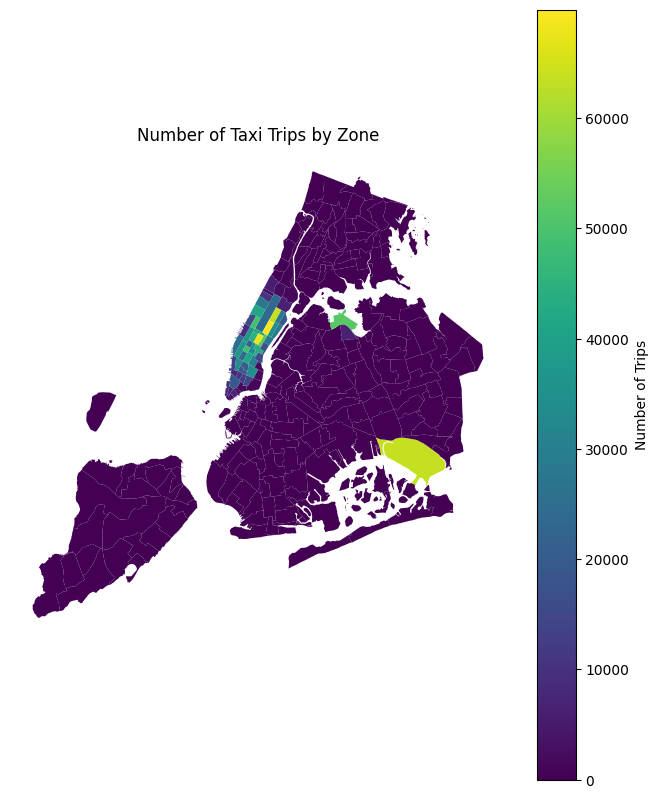

In [145]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

# Plot the map and display it
zones_with_trips.plot(column='trip_count',
                     ax=ax,
                     legend=True,
                     legend_kwds={'label': 'Number of Trips'})
plt.title('Number of Taxi Trips by Zone')
plt.axis('off')
plt.show()


Top 10 Zones by Number of Trips:
                        zone   borough  trip_count
       Upper East Side South Manhattan     69858.0
              Midtown Center Manhattan     67730.0
       Upper East Side North Manhattan     63695.0
                 JFK Airport    Queens     63639.0
                Midtown East Manhattan     52690.0
           LaGuardia Airport    Queens     51617.0
         Lincoln Square East Manhattan     48921.0
Penn Station/Madison Sq West Manhattan     48583.0
   Times Sq/Theatre District Manhattan     44372.0
                 Murray Hill Manhattan     43163.0


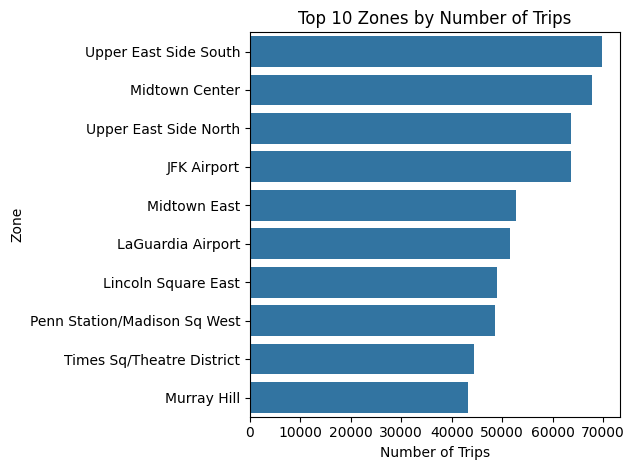

In [147]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort by trip count in descending order
zones_sorted = zones_with_trips.sort_values('trip_count', ascending=False)

# Display top zones
print("Top 10 Zones by Number of Trips:")
print(zones_sorted[['zone', 'borough', 'trip_count']].head(10).to_string(index=False))

# Create visualization
sns.barplot(x='trip_count', y='zone', data=zones_sorted.head(10))
plt.title('Top 10 Zones by Number of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


**Busiest Hours, Days, and Months:**
- Hours: Peak activity observed between 15:00 - 19:00.
- Days: Fridays, Saturdays, Sundays, and Mondays experience the highest traffic.
- Months: March, May, October, November, and December are the busiest months.

**Trends in Revenue Collected:**
- Revenue peaks in March, May, October, November, and December.

**Quarterly Revenue Trends:**
- Revenue in Q2 and Q4 is significantly higher compared to Q1 and Q3.
- Q4 generates the highest revenue, accounting for 27.1% of total earnings.

**Impact of Trip Factors on Fare Amount:**
- Trip Distance: Strong correlation (0.95) with fare amount, indicating distance is the primary fare determinant.
- Trip Duration: Moderate correlation (0.33) with fare amount.
- Passenger Count: Negligible correlation (0.04), suggesting fares are largely unaffected by the number of passengers.

**Impact of Trip Distance on Tip Amount:**
- A strong correlation (0.80) exists between trip distance and tip amount, indicating longer trips tend to yield higher tips.

**Busiest Zones:**
The top 10 busiest zones include:
1. Upper East Side South
2. Midtown Center
3. Upper East Side North
4. JFK Airport
5. Midtown East
6. LaGuardia Airport
7. Lincoln Square East
8. Penn Station/Madison Sq West
9. Times Sq/Theatre District
10. Murray Hill

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [151]:
# Find routes which have the slowest speeds at different times of the day
# Calculate trip duration in hours
df_new['trip_duration_hours'] = (df_new['tpep_dropoff_datetime'] - df_new['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Calculate speed in miles per hour
df_new['speed_mph'] = df_new['trip_distance'] / df_new['trip_duration_hours']

# Create route identifier (PULocationID-DOLocationID)
df_new['route'] = df_new['PULocationID'].astype(str) + '-' + df_new['DOLocationID'].astype(str)

# Group by hour and route to find average speed
hourly_route_speeds = df_new.groupby(['hour', 'route']).agg({
    'speed_mph': 'mean',
    'trip_distance': 'mean',
    'trip_duration_hours': 'mean',
    'PULocationID': 'first',
    'DOLocationID': 'first'
}).reset_index()

# Find slowest routes for each hour
slowest_routes = hourly_route_speeds.loc[hourly_route_speeds.groupby('hour')['speed_mph'].idxmin()]

# Merge with zones data to get zone names
slowest_routes = slowest_routes.merge(
    zones[['LocationID', 'zone', 'borough']], 
    left_on='PULocationID', 
    right_on='LocationID'
).rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'})

slowest_routes = slowest_routes.merge(
    zones[['LocationID', 'zone', 'borough']], 
    left_on='DOLocationID', 
    right_on='LocationID'
).rename(columns={'zone': 'dropoff_zone', 'borough': 'dropoff_borough'})

# Display results
print("SLOWEST ROUTES BY HOUR:")
print(slowest_routes[['hour', 'pickup_zone', 'dropoff_zone', 'speed_mph', 'trip_distance', 'trip_duration_hours']].round(2).to_string(index=False))


SLOWEST ROUTES BY HOUR:
 hour                   pickup_zone                  dropoff_zone  speed_mph  trip_distance  trip_duration_hours
    1       Greenwich Village South               Highbridge Park     -49.20           9.88                -0.20
    2                   Murray Hill                     Hudson Sq       0.13           3.07                23.33
    3                       Seaport                       Seaport       2.12           0.01                 0.00
    4                  Midtown East                  Midtown East       0.06           1.54                23.77
    5          TriBeCa/Civic Center           Crown Heights North       0.20           4.71                23.27
    6                 East Elmhurst             LaGuardia Airport       0.09           1.49                17.38
    7             Battery Park City                       Seaport       2.32           0.86                11.83
    8       Two Bridges/Seward Park                  East Chelsea       

How does identifying high-traffic, high-demand routes help us?

Identifying high-traffic, high-demand routes helps optimize taxi operations by enabling better resource allocation, reducing wait times, and maximizing revenue through strategic vehicle positioning and dynamic pricing. This analysis also improves customer satisfaction by ensuring reliable service in busy areas while reducing operational costs through efficient routing and fleet management.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

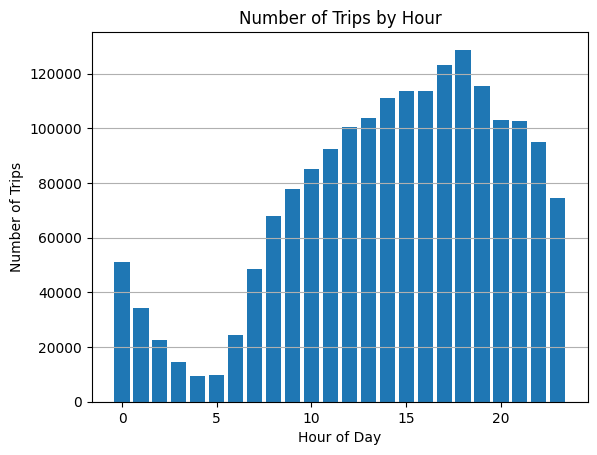

Busiest hour:
Hour: 18:00
Number of trips: 128,733


In [149]:
# Visualise the number of trips per hour and find the busiest hour

# Count trips per hour
hourly_trips = df.groupby('hour').size().reset_index(name='trip_count')

# Create visualization
plt.bar(hourly_trips['hour'], hourly_trips['trip_count'])
plt.title('Number of Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True, axis='y')
plt.show()

# Find and display the busiest hour
busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]
print("Busiest hour:")
print(f"Hour: {busiest_hour['hour']:02d}:00")
print(f"Number of trips: {busiest_hour['trip_count']:,}")



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

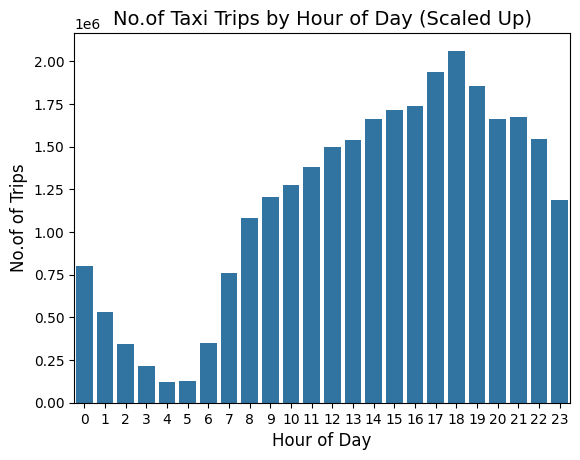

In [155]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05  # 5% sample

# Scale up the number of trips
trips_per_hour = df_new['hour'].value_counts().sort_index()
scaled_trips_per_hour = trips_per_hour / sample_fraction

# Create visualization of scaled numbers
sns.barplot(x=scaled_trips_per_hour.index, y=scaled_trips_per_hour.values)
plt.title('No.of Taxi Trips by Hour of Day (Scaled Up)', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('No.of of Trips', fontsize=12)
plt.xticks(rotation=0)
plt.show()


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [156]:
# Compare traffic trends for the week days and weekends

# Extract day of week (0=Monday, 6=Sunday) and hour
df_new['day_of_week'] = df_new['tpep_pickup_datetime'].dt.dayofweek

# Create weekend flag (0=weekday, 1=weekend)
df_new['is_weekend'] = df_new['day_of_week'].isin([5, 6]).astype(int)

# Group by weekend status and hour, then scale up
trips_by_type = df_new.groupby(['is_weekend', 'hour']).size() / sample_fraction
weekday_trips = trips_by_type[0]
weekend_trips = trips_by_type[1]

# Create visualization
plt.figure(figsize=(14, 6))
plt.plot(weekday_trips.index, weekday_trips.values, label='Weekdays', linewidth=2)
plt.plot(weekend_trips.index, weekend_trips.values, label='Weekends', linewidth=2)
plt.title('No. of Taxi Trips by Hour: Weekdays vs Weekends', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('No. of Trips', fontsize=12)
plt.xticks(range(24))
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [157]:
# Print comparison statistics
print("Weekday Statistics:")
print(f"Total estimated trips: {weekday_trips.sum():,.0f}")
print(f"Average trips per hour: {weekday_trips.mean():,.0f}")
print(f"Peak hour: {weekday_trips.idxmax()}:00 with {weekday_trips.max():,.0f} trips")
print(f"Quiet hour: {weekday_trips.idxmin()}:00 with {weekday_trips.min():,.0f} trips")

print("\nWeekend Statistics:")
print(f"Total estimated trips: {weekend_trips.sum():,.0f}")
print(f"Average trips per hour: {weekend_trips.mean():,.0f}")
print(f"Peak hour: {weekend_trips.idxmax()}:00 with {weekend_trips.max():,.0f} trips")
print(f"Quiet hour: {weekend_trips.idxmin()}:00 with {weekend_trips.min():,.0f} trips")

# Calculate percentage difference
weekend_ratio = (weekend_trips.sum() / weekday_trips.sum() * 100).round(2)
print(f"\nWeekend trips are {weekend_ratio}% of weekday trips")

Weekday Statistics:
Total estimated trips: 20,697,280
Average trips per hour: 862,387
Peak hour: 18:00 with 1,587,260 trips
Quiet hour: 4:00 with 47,320 trips

Weekend Statistics:
Total estimated trips: 7,560,820
Average trips per hour: 315,034
Peak hour: 17:00 with 475,480 trips
Quiet hour: 5:00 with 29,260 trips

Weekend trips are 36.53% of weekday trips


Identifying busy and quiet hours helps optimize taxi operations by enabling dynamic pricing, efficient driver scheduling, and strategic vehicle deployment to maximize revenue during peak times while minimizing idle time during off-peak periods.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [159]:
# Find top 10 pickup and dropoff zones

# Calculate total pickups and dropoffs per zone
pickup_counts = df_new['PULocationID'].value_counts() / sample_fraction
dropoff_counts = df_new['DOLocationID'].value_counts() / sample_fraction

# Create DataFrames for both pickups and dropoffs
pickup_df = pd.DataFrame({'pickups': pickup_counts})
dropoff_df = pd.DataFrame({'dropoffs': dropoff_counts})

# Get top 10 zones for both pickups and dropoffs
top_10_pickup_zones = pickup_counts.nlargest(10)
top_10_dropoff_zones = dropoff_counts.nlargest(10)

# Get zone names for the top zones
top_pickup_zone_names = zones[zones['LocationID'].isin(top_10_pickup_zones.index)][['LocationID', 'zone']]
top_dropoff_zone_names = zones[zones['LocationID'].isin(top_10_dropoff_zones.index)][['LocationID', 'zone']]

# Create a mapping of LocationID to zone names
zone_name_map = dict(zip(zones['LocationID'], zones['zone']))

# Analyze hourly trends for top pickup zones
pickup_hourly = df_new[df_new['PULocationID'].isin(top_10_pickup_zones.index)].groupby(
    ['PULocationID', 'hour']).size() / sample_fraction
pickup_hourly = pickup_hourly.unstack(level=0)

# Analyze hourly trends for top dropoff zones
dropoff_hourly = df_new[df_new['DOLocationID'].isin(top_10_dropoff_zones.index)].groupby(
    ['DOLocationID', 'hour']).size() / sample_fraction
dropoff_hourly = dropoff_hourly.unstack(level=0)

# Create visualizations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot pickup trends
for zone_id in top_10_pickup_zones.index:
    zone_name = zone_name_map[zone_id]
    ax1.plot(pickup_hourly.index, pickup_hourly[zone_id], 
             label=f"{zone_name} ({zone_id})", linewidth=2)

ax1.set_title('Hourly Pickup Trends in Top 10 Pickup Zones', fontsize=14)
ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Estimated Number of Pickups', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticks(range(24))

# Plot dropoff trends
for zone_id in top_10_dropoff_zones.index:
    zone_name = zone_name_map[zone_id]
    ax2.plot(dropoff_hourly.index, dropoff_hourly[zone_id], 
             label=f"{zone_name} ({zone_id})", linewidth=2)

ax2.set_title('Hourly Dropoff Trends in Top 10 Dropoff Zones', fontsize=14)
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Estimated Number of Dropoffs', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_xticks(range(24))

plt.tight_layout()
plt.show()

# Print summary
print("Top 10 Pickup Zones:")
for zone_id, count in top_10_pickup_zones.items():
    print(f"Zone {zone_id} ({zone_name_map[zone_id]}): {count:,.0f} estimated pickups")

print("\nTop 10 Dropoff Zones:")
for zone_id, count in top_10_dropoff_zones.items():
    print(f"Zone {zone_id} ({zone_name_map[zone_id]}): {count:,.0f} estimated dropoffs")

# Find peak hours for each top zone
print("\nPeak Hours for Top Pickup Zones:")
for zone_id in top_10_pickup_zones.index:
    peak_hour = pickup_hourly[zone_id].idxmax()
    peak_count = pickup_hourly[zone_id].max()
    print(f"Zone {zone_id} ({zone_name_map[zone_id]}): Peak at {peak_hour}:00 with {peak_count:,.0f} pickups")

print("\nPeak Hours for Top Dropoff Zones:")
for zone_id in top_10_dropoff_zones.index:
    peak_hour = dropoff_hourly[zone_id].idxmax()
    peak_count = dropoff_hourly[zone_id].max()
    print(f"Zone {zone_id} ({zone_name_map[zone_id]}): Peak at {peak_hour}:00 with {peak_count:,.0f} dropoffs")

Top 10 Pickup Zones:
Zone 237 (Upper East Side South): 1,397,160 estimated pickups
Zone 161 (Midtown Center): 1,354,600 estimated pickups
Zone 236 (Upper East Side North): 1,273,900 estimated pickups
Zone 132 (JFK Airport): 1,272,780 estimated pickups
Zone 162 (Midtown East): 1,053,800 estimated pickups
Zone 138 (LaGuardia Airport): 1,032,340 estimated pickups
Zone 142 (Lincoln Square East): 978,420 estimated pickups
Zone 186 (Penn Station/Madison Sq West): 971,660 estimated pickups
Zone 230 (Times Sq/Theatre District): 887,440 estimated pickups
Zone 170 (Murray Hill): 863,260 estimated pickups

Top 10 Dropoff Zones:
Zone 236 (Upper East Side North): 1,349,580 estimated dropoffs
Zone 237 (Upper East Side South): 1,250,140 estimated dropoffs
Zone 161 (Midtown Center): 1,107,400 estimated dropoffs
Zone 170 (Murray Hill): 864,040 estimated dropoffs
Zone 239 (Upper West Side South): 854,260 estimated dropoffs
Zone 142 (Lincoln Square East): 829,740 estimated dropoffs
Zone 162 (Midtown East

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [161]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Merge the DataFrames and calculate ratio
zone_ratios = pickup_df.merge(dropoff_df, left_index=True, right_index=True, how='outer')
zone_ratios = zone_ratios.fillna(0)  # Fill NaN with 0 for zones with no pickups/dropoffs
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickups'] / zone_ratios['dropoffs']

# Get zone names
zone_ratios['zone_name'] = zone_ratios.index.map(zone_name_map)

# Sort by ratio and get top and bottom 10
top_10_ratios = zone_ratios.nlargest(10, 'pickup_dropoff_ratio')
bottom_10_ratios = zone_ratios.nsmallest(10, 'pickup_dropoff_ratio')

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot top 10 ratios
sns.barplot(x='zone_name', y='pickup_dropoff_ratio', data=top_10_ratios, ax=ax1)
ax1.set_title('Top 10 Zones with Highest Pickup/Dropoff Ratios', fontsize=14)
ax1.set_xlabel('Zone', fontsize=12)
ax1.set_ylabel('Pickup/Dropoff Ratio', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Plot bottom 10 ratios
sns.barplot(x='zone_name', y='pickup_dropoff_ratio', data=bottom_10_ratios, ax=ax2)
ax2.set_title('Top 10 Zones with Lowest Pickup/Dropoff Ratios', fontsize=14)
ax2.set_xlabel('Zone', fontsize=12)
ax2.set_ylabel('Pickup/Dropoff Ratio', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("Top 10 Zones with Highest Pickup/Dropoff Ratios:")
for idx, row in top_10_ratios.iterrows():
    print(f"Zone {idx} ({row['zone_name']}):")
    print(f"  Pickups: {row['pickups']:,.0f}")
    print(f"  Dropoffs: {row['dropoffs']:,.0f}")
    print(f"  Ratio: {row['pickup_dropoff_ratio']:.2f}\n")

print("\nTop 10 Zones with Lowest Pickup/Dropoff Ratios:")
for idx, row in bottom_10_ratios.iterrows():
    print(f"Zone {idx} ({row['zone_name']}):")
    print(f"  Pickups: {row['pickups']:,.0f}")
    print(f"  Dropoffs: {row['dropoffs']:,.0f}")
    print(f"  Ratio: {row['pickup_dropoff_ratio']:.2f}\n")

Top 10 Zones with Highest Pickup/Dropoff Ratios:
Zone 2 (Jamaica Bay):
  Pickups: 40
  Dropoffs: 0
  Ratio: inf

Zone 199 (Rikers Island):
  Pickups: 40
  Dropoffs: 0
  Ratio: inf

Zone 70 (East Elmhurst):
  Pickups: 128,040
  Dropoffs: 9,240
  Ratio: 13.86

Zone 132 (JFK Airport):
  Pickups: 1,272,780
  Dropoffs: 268,600
  Ratio: 4.74

Zone 138 (LaGuardia Airport):
  Pickups: 1,032,340
  Dropoffs: 359,540
  Ratio: 2.87

Zone 207 (Saint Michaels Cemetery/Woodside):
  Pickups: 240
  Dropoffs: 140
  Ratio: 1.71

Zone 186 (Penn Station/Madison Sq West):
  Pickups: 971,660
  Dropoffs: 588,840
  Ratio: 1.65

Zone 43 (Central Park):
  Pickups: 478,340
  Dropoffs: 344,700
  Ratio: 1.39

Zone 114 (Greenwich Village South):
  Pickups: 396,500
  Dropoffs: 286,800
  Ratio: 1.38

Zone 249 (West Village):
  Pickups: 677,960
  Dropoffs: 509,400
  Ratio: 1.33


Top 10 Zones with Lowest Pickup/Dropoff Ratios:
Zone 3 (Allerton/Pelham Gardens):
  Pickups: 0
  Dropoffs: 1,040
  Ratio: 0.00

Zone 5 (Arden

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [162]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter for night hours (11 PM to 5 AM)
night_hours = df_new[df_new['hour'].isin([23, 0, 1, 2, 3, 4, 5])]

# Calculate night pickups and dropoffs per zone
night_pickup_counts = night_hours['PULocationID'].value_counts() / sample_fraction
night_dropoff_counts = night_hours['DOLocationID'].value_counts() / sample_fraction

# Get top 10 zones for night pickups and dropoffs
top_10_night_pickups = night_pickup_counts.nlargest(10)
top_10_night_dropoffs = night_dropoff_counts.nlargest(10)

# Get zone names
top_night_pickup_names = zones[zones['LocationID'].isin(top_10_night_pickups.index)][['LocationID', 'zone', 'borough']]
top_night_dropoff_names = zones[zones['LocationID'].isin(top_10_night_dropoffs.index)][['LocationID', 'zone', 'borough']]

# Create a mapping of LocationID to zone names
zone_name_map = dict(zip(zones['LocationID'], zones['zone']))
borough_map = dict(zip(zones['LocationID'], zones['borough']))

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot top 10 night pickup zones
sns.barplot(x=top_10_night_pickups.index.map(zone_name_map), 
            y=top_10_night_pickups.values, ax=ax1)
ax1.set_title('Top 10 Night Pickup Zones (11 PM - 5 AM)', fontsize=14)
ax1.set_xlabel('Zone', fontsize=12)
ax1.set_ylabel('Estimated Number of Pickups', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Plot top 10 night dropoff zones
sns.barplot(x=top_10_night_dropoffs.index.map(zone_name_map), 
            y=top_10_night_dropoffs.values, ax=ax2)
ax2.set_title('Top 10 Night Dropoff Zones (11 PM - 5 AM)', fontsize=14)
ax2.set_xlabel('Zone', fontsize=12)
ax2.set_ylabel('Estimated Number of Dropoffs', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("Top 10 Night Pickup Zones (11 PM - 5 AM):")
for zone_id, count in top_10_night_pickups.items():
    print(f"Zone {zone_id} ({zone_name_map[zone_id]}, {borough_map[zone_id]}): {count:,.0f} estimated pickups")

print("\nTop 10 Night Dropoff Zones (11 PM - 5 AM):")
for zone_id, count in top_10_night_dropoffs.items():
    print(f"Zone {zone_id} ({zone_name_map[zone_id]}, {borough_map[zone_id]}): {count:,.0f} estimated dropoffs")

# Calculate percentage of total night trips
total_night_pickups = night_pickup_counts.sum()
total_night_dropoffs = night_dropoff_counts.sum()

print(f"\nTotal estimated night pickups: {total_night_pickups:,.0f}")
print(f"Total estimated night dropoffs: {total_night_dropoffs:,.0f}")
print(f"Top 10 zones account for {top_10_night_pickups.sum()/total_night_pickups*100:.1f}% of night pickups")
print(f"Top 10 zones account for {top_10_night_dropoffs.sum()/total_night_dropoffs*100:.1f}% of night dropoffs")


Top 10 Night Pickup Zones (11 PM - 5 AM):
Zone 79 (East Village, Manhattan): 256,860 estimated pickups
Zone 249 (West Village, Manhattan): 209,880 estimated pickups
Zone 132 (JFK Airport, Queens): 190,180 estimated pickups
Zone 48 (Clinton East, Manhattan): 161,200 estimated pickups
Zone 148 (Lower East Side, Manhattan): 160,100 estimated pickups
Zone 114 (Greenwich Village South, Manhattan): 145,700 estimated pickups
Zone 230 (Times Sq/Theatre District, Manhattan): 117,620 estimated pickups
Zone 186 (Penn Station/Madison Sq West, Manhattan): 107,080 estimated pickups
Zone 164 (Midtown South, Manhattan): 95,720 estimated pickups
Zone 138 (LaGuardia Airport, Queens): 93,780 estimated pickups

Top 10 Night Dropoff Zones (11 PM - 5 AM):
Zone 79 (East Village, Manhattan): 135,080 estimated dropoffs
Zone 48 (Clinton East, Manhattan): 102,120 estimated dropoffs
Zone 170 (Murray Hill, Manhattan): 100,920 estimated dropoffs
Zone 107 (Gramercy, Manhattan): 97,020 estimated dropoffs
Zone 68 (Eas

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [163]:
# Filter for night hours (11 PM to 5 AM)

# Define night and day hours
night_hours = [23, 0, 1, 2, 3, 4, 5]  # 11 PM to 5 AM
day_hours = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]  # 6 AM to 10 PM

# Filter data for night and day
night_trips = df_new[df_new['hour'].isin(night_hours)]
day_trips = df_new[df_new['hour'].isin(day_hours)]

# Calculate total revenue for night and day
night_revenue = night_trips['total_amount'].sum() / sample_fraction
day_revenue = day_trips['total_amount'].sum() / sample_fraction

# Calculate number of trips
night_trip_count = len(night_trips) / sample_fraction
day_trip_count = len(day_trips) / sample_fraction

# Calculate average fare
night_avg_fare = night_revenue / night_trip_count
day_avg_fare = day_revenue / day_trip_count

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Revenue share pie chart
revenue_data = [night_revenue, day_revenue]
ax1.pie(revenue_data, labels=['Night (11 PM - 5 AM)', 'Day (6 AM - 10 PM)'], 
        autopct='%1.1f%%')
ax1.set_title('Revenue Share by Time of Day', fontsize=14)

# Trip count pie chart
trip_data = [night_trip_count, day_trip_count]
ax2.pie(trip_data, labels=['Night (11 PM - 5 AM)', 'Day (6 AM - 10 PM)'], 
        autopct='%1.1f%%')
ax2.set_title('Trip Count Share by Time of Day', fontsize=14)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("Revenue Analysis:")
print(f"Night Revenue (11 PM - 5 AM): ${night_revenue:,.2f}")
print(f"Day Revenue (6 AM - 10 PM): ${day_revenue:,.2f}")
print(f"Total Revenue: ${(night_revenue + day_revenue):,.2f}")
print(f"Night Revenue Share: {(night_revenue/(night_revenue + day_revenue)*100):.1f}%")
print(f"Day Revenue Share: {(day_revenue/(night_revenue + day_revenue)*100):.1f}%")

print("\nTrip Analysis:")
print(f"Night Trips: {night_trip_count:,.0f}")
print(f"Day Trips: {day_trip_count:,.0f}")
print(f"Total Trips: {(night_trip_count + day_trip_count):,.0f}")
print(f"Night Trip Share: {(night_trip_count/(night_trip_count + day_trip_count)*100):.1f}%")
print(f"Day Trip Share: {(day_trip_count/(night_trip_count + day_trip_count)*100):.1f}%")

print("\nAverage Fare Analysis:")
print(f"Night Average Fare: ${night_avg_fare:.2f}")
print(f"Day Average Fare: ${day_avg_fare:.2f}")
print(f"Night/Day Average Fare Ratio: {night_avg_fare/day_avg_fare:.2f}")


Revenue Analysis:
Night Revenue (11 PM - 5 AM): $99,741,205.40
Day Revenue (6 AM - 10 PM): $736,088,152.80
Total Revenue: $835,829,358.20
Night Revenue Share: 11.9%
Day Revenue Share: 88.1%

Trip Analysis:
Night Trips: 3,329,980
Day Trips: 24,928,120
Total Trips: 28,258,100
Night Trip Share: 11.8%
Day Trip Share: 88.2%

Average Fare Analysis:
Night Average Fare: $29.95
Day Average Fare: $29.53
Night/Day Average Fare Ratio: 1.01


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [166]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculate fare per mile per passenger
df_new['fare_per_mile_per_passenger'] = df_new['fare_amount'] / (df_new['trip_distance'] * df_new['passenger_count'])

# Group by passenger count and calculate statistics
fare_stats = df_new.groupby('passenger_count').agg({
    'fare_per_mile_per_passenger': ['mean', 'median', 'std', 'count'],
    'fare_amount': 'mean',
    'trip_distance': 'mean'
}).round(2)

# Scale up the counts
fare_stats[('fare_per_mile_per_passenger', 'count')] = fare_stats[('fare_per_mile_per_passenger', 'count')] / sample_fraction

# Create visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='passenger_count', y='fare_per_mile_per_passenger', data=df_new)
plt.title('Fare per Mile per Passenger vs Passenger Count', fontsize=14)
plt.xlabel('No. of Passengers', fontsize=12)
plt.ylabel('Fare per Mile per Passenger (USd)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analysis Sumamry
print("\nAnalysis Sumamry:")
for passengers in fare_stats.index:
    avg_fare_per_mile = fare_stats.loc[passengers, ('fare_amount', 'mean')] / fare_stats.loc[passengers, ('trip_distance', 'mean')]
    print(f"\n{passengers} Passenger(s):")
    print(f"Average fare per mile: ${avg_fare_per_mile:.2f}")
    print(f"Average fare per mile per passenger: ${fare_stats.loc[passengers, ('fare_per_mile_per_passenger', 'mean')]:.2f}")
    print(f"Estimated number of trips: {fare_stats.loc[passengers, ('fare_per_mile_per_passenger', 'count')]:,.0f}")


Analysis Sumamry:

1 Passenger(s):
Average fare per mile: $5.73
Average fare per mile per passenger: $9.27
Estimated number of trips: 21,924,040

2 Passenger(s):
Average fare per mile: $5.38
Average fare per mile per passenger: $5.00
Estimated number of trips: 4,197,080

3 Passenger(s):
Average fare per mile: $5.58
Average fare per mile per passenger: $3.33
Estimated number of trips: 1,006,820

4 Passenger(s):
Average fare per mile: $5.57
Average fare per mile per passenger: $3.93
Estimated number of trips: 507,780

5 Passenger(s):
Average fare per mile: $5.65
Average fare per mile per passenger: $1.59
Estimated number of trips: 373,720

6 Passenger(s):
Average fare per mile: $5.69
Average fare per mile per passenger: $1.28
Estimated number of trips: 248,660


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

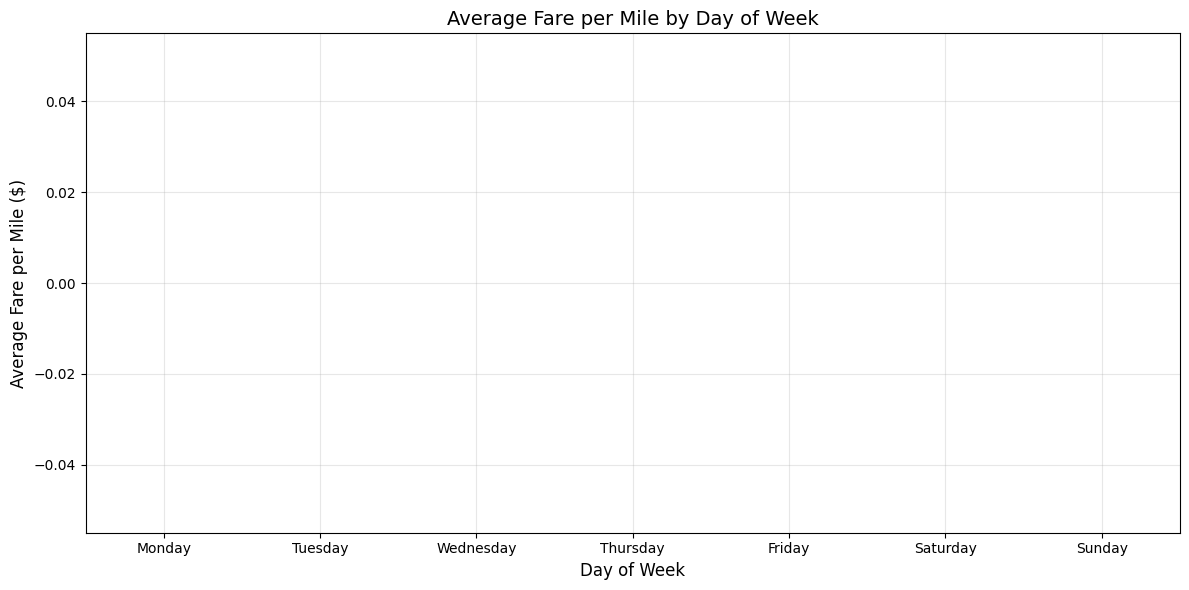

In [167]:
# Compare the average fare per mile for different days and for different times of the day

# Calculate fare per mile
df_new['fare_per_mile'] = df_new['fare_amount'] / df_new['trip_distance']

# Group by day of week and calculate statistics
day_stats = df_new.groupby('day_of_week').agg({
    'fare_per_mile': ['mean', 'median', 'std', 'count'],
    'fare_amount': 'mean',
    'trip_distance': 'mean'
}).round(2)

# Scale up the counts
day_stats[('fare_per_mile', 'count')] = day_stats[('fare_per_mile', 'count')] / sample_fraction

# Order days of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_stats = day_stats.reindex(day_order)

# Create visualization for days
plt.figure(figsize=(12, 6))
sns.barplot(x=day_stats.index, y=day_stats[('fare_per_mile', 'mean')])
plt.title('Average Fare per Mile by Day of Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Fare per Mile ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Group by hour and calculate statistics
hour_stats = df_new.groupby('hour').agg({
    'fare_per_mile': ['mean', 'median', 'std', 'count'],
    'fare_amount': 'mean',
    'trip_distance': 'mean'
}).round(2)

# Scale up the counts
hour_stats[('fare_per_mile', 'count')] = hour_stats[('fare_per_mile', 'count')] / sample_fraction

# Create visualization for hours
plt.figure(figsize=(12, 6))
sns.lineplot(x=hour_stats.index, y=hour_stats[('fare_per_mile', 'mean')], marker='o')
plt.title('Average Fare per Mile by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Fare per Mile ($)', fontsize=12)
plt.xticks(range(24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.